Understanding Scale Invariance
### CS 655-71970

In [ ]:
# Basic Image Loading
from PIL import Image
import requests
from io import BytesIO
response = requests.get('https://raw.githubusercontent.com/ankitmhatre/cs655/main/taco2.jpg')
img = Image.open(BytesIO(response.content))

# Common
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
## Resnet50

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

modelResNet50 = ResNet50(weights='imagenet')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predsResNet50 = modelResNet50.predict(x)
print('Resnet50 - Predicted:', decode_predictions(predsResNet50, top=5)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n07880968', 'burrito', 0.8035448), ('n07684084', 'French_loaf', 0.0694031), ('n07579787', 'plate', 0.06008326), ('n03887697', 'paper_towel', 0.011272817), ('n03908714', 'pencil_sharpener', 0.004051717)]


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

modelVGG16 = VGG16(weights='imagenet')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predsVGG16 = modelVGG16.predict(x)
print('VGG16 - Predicted:', decode_predictions(predsVGG16, top=5)[0])

1/1 [==============================] - 1s 733ms/step
Predicted: [('n07745940', 'strawberry', 0.2118403), ('n07753275', 'pineapple', 0.059708443), ('n07749582', 'lemon', 0.054075375), ('n07753592', 'banana', 0.049745075), ('n07880968', 'burrito', 0.04437624)]


In [ ]:
# from tensorflow.keras.applications.vgg19 import VGG19
# from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

# modelVGG19 = VGG19(weights='imagenet')

# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# predsVGG19 = modelVGG19.predict(x)
# print('VGG19 - Predicted:', decode_predictions(predsVGG19, top=5)[0])

1/1 [==============================] - 1s 868ms/step
Predicted: [('n07745940', 'strawberry', 0.49003795), ('n07579787', 'plate', 0.11983647), ('n07583066', 'guacamole', 0.061401516), ('n07614500', 'ice_cream', 0.04689477), ('n07880968', 'burrito', 0.027317762)]


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.metrics import Accuracy

# # Load the VGG16 model
# model = VGG16(weights='imagenet', include_top=True)

# # Load the dataset
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# # Normalize the dataset
# # x_train = x_train / 255.0
# # x_test = x_test / 255.0

# x_test = tf.image.resize(x_test, (224, 224))
# x_train = tf.image.resize(x_train, (224, 224))


# # Evaluate the model on the dataset
# predictions = model.predict(x_test)

# # Print the accuracy of the model
# accuracy = tf.keras.metrics.Accuracy(y_test, predictions)
# print(accuracy)

In [ ]:


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
input_size = (224, 224)
batch_size = 32
epochs = 10
num_classes = 10  # Change this based on the number of classes in your dataset

# Build ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the dataset
train_generator = train_datagen.flow_from_directory('path/to/train/dataset',
                                                    target_size=input_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('path/to/validation/dataset',
                                                        target_size=input_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

# Train the model
model.fit(train_generator,
          epochs=epochs,
          validation_data=validation_generator)

# Evaluate the model
test_generator = test_datagen.flow_from_directory('path/to/test/dataset',
                                                  target_size=input_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

eval_result = model.evaluate(test_generator)
print(f'Test loss: {eval_result[0]}, Test accuracy: {eval_result[1]}')


In [3]:
!pip install tensorflow-preprocessing

ERROR: Could not find a version that satisfies the requirement tensorflow-preprocessing (from versions: none)
ERROR: No matching distribution found for tensorflow-preprocessing


In [2]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a1/f6/57de91ea40c670527cd47a6548bf2cbedc68cec57c041793b256356abad7/opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 45.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
dir0 = '../d/input/indian-food-images-dataset/'
paths=[]
labels=[]

for dirname, _, filenames in os.walk(dir0):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            paths+=[(os.path.join(dirname, filename))]
            labels+=[dirname.split('/')[-1]]
data=pd.DataFrame(columns=['path','label'])
data['path']=paths
data['label']=labels
display(data)

,path,label
0,../d/input/indian-food-images-dataset/shrikhan...,shrikhand
1,../d/input/indian-food-images-dataset/shrikhan...,shrikhand
2,../d/input/indian-food-images-dataset/shrikhan...,shrikhand
3,../d/input/indian-food-images-dataset/shrikhan...,shrikhand
4,../d/input/indian-food-images-dataset/shrikhan...,shrikhand
...,...,...
3995,../d/input/indian-food-images-dataset/sheer_ko...,sheer_korma
3996,../d/input/indian-food-images-dataset/sheer_ko...,sheer_korma
3997,../d/input/indian-food-images-dataset/sheer_ko...,sheer_korma
3998,../d/input/indian-food-images-dataset/sheer_ko...,sheer_korma


Found 3200 validated image filenames belonging to 80 classes.
Found 800 validated image filenames belonging to 80 classes.
Epoch 1/10
100/100 [==============================] - 498s 5s/step - loss: 5.4733 - accuracy: 0.0134 - val_loss: 17.8833 - val_accuracy: 0.0063
Epoch 2/10
100/100 [==============================] - 553s 6s/step - loss: 4.3051 - accuracy: 0.0216 - val_loss: 4.3850 - val_accuracy: 0.0037
Epoch 3/10
100/100 [==============================] - 551s 6s/step - loss: 4.2023 - accuracy: 0.0294 - val_loss: 4.3876 - val_accuracy: 0.0037
Epoch 4/10
100/100 [==============================] - 526s 5s/step - loss: 4.0870 - accuracy: 0.0475 - val_loss: 4.4121 - val_accuracy: 0.0075
Epoch 5/10
100/100 [==============================] - 524s 5s/step - loss: 3.9472 - accuracy: 0.0572 - val_loss: 4.4719 - val_accuracy: 0.0113
Epoch 6/10
100/100 [==============================] - 520s 5s/step - loss: 3.7880 - accuracy: 0.0853 - val_loss: 4.5427 - val_accuracy: 0.0188
Epoch 7/10
100/100

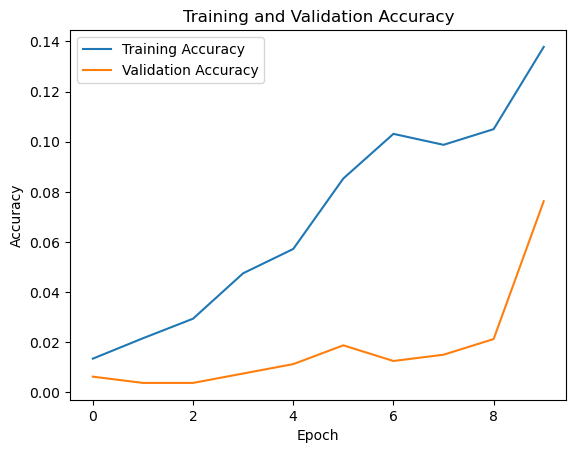

/Users/ankit/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 23s 932ms/step - loss: 3.8330 - accuracy: 0.0763
Test loss: 3.83304500579834, Test accuracy: 0.07625000178813934


In [44]:
import os
import json
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
        
# Set the path to your dataset
dir0 = '../d/input/indian-food-images-dataset/'

# Collect paths and labels
paths = []
labels = []
for dirname, _, filenames in os.walk(dir0):
    for filename in filenames:
        if filename[-4:] == '.jpg':
            paths += [os.path.join(dirname, filename)]
            labels += [dirname.split('/')[-1]]

# Create a DataFrame for easier handling
import pandas as pd
data = pd.DataFrame({'Path': paths, 'Label': labels})

# Split the dataset into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Define constants
input_size = (224, 224)
batch_size = 32
epochs = 10
num_classes = len(data['Label'].unique())
data_info = {
    'data_generator_config': {
        'rescale': 1./255,
        'shear_range': 0.2,
        'zoom_range': 0.2,
        'horizontal_flip': True
    },
    'class_labels': list(data['Label'].unique())
}
with open('../d/working/data_info.json', 'w') as json_file:
    json.dump(data_info, json_file)
# ...

# Load data generator configuration and class information
with open('../d/working/data_info.json', 'r') as json_file:
    loaded_data_info = json.load(json_file)
    loaded_data_generator_config = loaded_data_info['data_generator_config']
    loaded_class_labels = loaded_data_info['class_labels']
    
    

# Build ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(**loaded_data_generator_config)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training dataset
train_generator = train_datagen.flow_from_dataframe(dataframe=train_data,
                                                    x_col='Path',
                                                    y_col='Label',
                                                    target_size=input_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Load and preprocess the validation dataset
val_generator = val_datagen.flow_from_dataframe(dataframe=val_data,
                                                x_col='Path',
                                                y_col='Label',
                                                target_size=input_size,
                                                batch_size=batch_size,
                                                class_mode='categorical')

# Train the model
history = model.fit(train_generator,
          epochs=epochs,
          validation_data=val_generator)
# Plot the graph

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the trained model

model.save('../d/working/food_recognition_model2.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(val_generator)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')


In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
loaded_model = load_model('../d/working/food_recognition_model.h5')

def get_label_from_index(index):
    return loaded_class_labels[index]


# Load and preprocess an image for prediction
image_path = '../samples/lassi.jpg'  # Replace with the actual path to your image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values

# Make predictions
predictions = loaded_model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class label using the loaded class labels
predicted_class_label = get_label_from_index(predicted_class_index)

# Print the predicted class label
print(f'Predicted class label: {predicted_class_label}')











1/1 [==============================] - 1s 600ms/step
Predicted class label: kakinada_khaja
